# INF554 - Machine and Deep Learning
## Lab 7 - Regularization

The following code loads and visualizes some data for classification. We will reapproach logistic regression with stochastic gradient descent, however this time we will pay closer attention to aspects of regularization.

In [67]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc

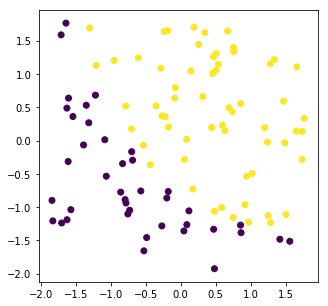

In [73]:
D = np.loadtxt("./data/data.csv",delimiter=',')
X = D[:,:2]
X -= X.mean(0)
X /= X.std(0) + 1e-5
Y = D[:,-1]
# X, Y = make_blobs(n_samples=500, n_features=2, centers=2)
X_min = X.min()
X_max = X.max()
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

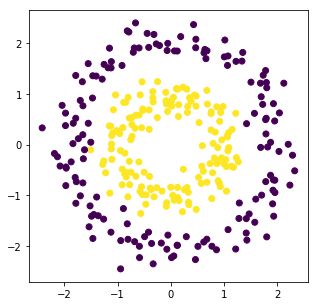

In [74]:
def get_circle(r=1.0, N=100):  
    # Use polar coords to get unif dist points  
    step = np.pi * 2.0 / N  
    t = np.arange(0, np.pi * 2.0, step)  
    x_1 = r * np.cos(t)  
    x_2 = r * np.sin(t)  
    return np.column_stack((x_1, x_2))
      
def get_noise(stddev=0.2, N=100):  
    # 2d gaussian random noise  
    x_1 = np.random.normal(0, stddev, N)  
    x_2 = np.random.normal(0, stddev, N)  
    return np.column_stack((x_1, x_2))    
  
def generateData(N=100,shuffle=True):
    X = np.vstack([get_circle(r=1,N=N//2) + get_noise(N=N//2), get_circle(r=2,N=N//2) + get_noise(N=N//2)])
    Y = np.vstack([np.ones((N//2,1)),np.zeros((N//2,1))]).squeeze().astype(np.int)
    if shuffle:
        p=np.random.permutation(N)
        X = X[p]
        Y = Y[p]
        
    return X,Y 

X, Y = generateData(N=300,shuffle=False)
X_min = X.min()
X_max = X.max()

n,d = X.shape
k = 2
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

### 1. Polynomial Logistic Regression

We will construct features from polynomials of the original features. For example, the feature space
of polynomial terms of some $x = \left[x1, x2\right]$ up to the sixth degree:
\begin{equation}
\Phi_6(x) = \left[1, x_1, x_2, x_1^2, x_1x_2, x_2^2, x_1^3, \ldots, x_1x_2^5, x_2^6\right]
\end{equation}

As a result of this mapping, our feature vector has been transformed into a 28-dimensional vector.
A logistic regression classifier trained on this higher-dimension feature vector will have a more complex
(non-linear) decision boundary with respect to the original feature space.



### Task 1
Implement the feature map

In [75]:
def FeatureMap(X,degree=1):
    Xpol = X.copy()
    res = [X.copy()]
    
    for i in range(1,degree):
        Xpol = Xpol[:, :, np.newaxis] * X[:, np.newaxis, :]
        Xpol = Xpol.reshape((Xpol.shape[0],-1))
        res.append(Xpol)
    feat = np.hstack(res)
    return feat

def AddIntercept(X):
    return np.vstack([X.T,np.ones(X.shape[0]).T]).T

### Regularized Logistic Regression

We define the error (cost) function as the negative log-likelihood:
\begin{equation}
J\left(θ\right) = - \frac{1}{m}\sum_{i=1}^m
\left[
    y^{(i)}
    \log\left(
        p_{\theta}\left(
            x^{(i)}
        \right)
    \right)
    +
    \left( 1 - y^{(i)} \right)
    \log\left(
         1 - p_{\theta}\left(
            x^{(i)}
         \right)
    \right)
\right]
+
\frac{\lambda}{2}
\sum_{j=1}^n \theta_j^2
\end{equation}

which includes a penalty term on the weights. The strength of this penalty term is governed by $\lambda$. Note that *we never regularize the bias term $\theta_0$*. 

In [76]:
def sigmoid(x):
    """
    Computes sigmoid of `x` element-wise.
    Specifically, `y = 1 / (1 + exp(-x))`.
    Args:
        x: ndarray
    Returns:
        A ndarray with the same type as `x`.
    """
    epsilon  = 1e-6
    g = 1./(1.+np.exp(-x + epsilon))
    g = np.clip(g, epsilon, 1-epsilon)
    
    return g

In [77]:
def logistic_forward(w, X, logit=True):
    # Predict whether each label is 0 or 1 using learned logistic regression parameters. The threshold is set at 0.5
 
    # write your code here

    return logits

In [78]:
def cost(X, y, w, lam=0.1): 
    
    # Computes the cost using w as the parameters for logistic regression. 
    
    # write your code here

    return E.mean()

In [79]:
def compute_grad( X, y, w , lam=0.1):
    # Computes the gradient of the cost with respect to the parameters.
     
    # write your code here
    return dE

### Task 2. 
Extend your implementation of SGD from the Lab 2, to incorporate the $l_2$ penalty
term.

In [80]:
def cost_reg( X, y, w, lam=0.1): 
    # Computes the cost using w as the parameters for logistic regression. 
    
    # write your code here
        
    return E.mean()

In [81]:
def compute_grad_reg( X, y, w , lam=0.1):
    # Computes the gradient of the cost with respect to the parameters.
    
    # write your code here

    return dE

### Task 3.
Try out different regularization parameters $\lambda$ and polynomial degrees for the available datasets to understand how regularization prevents over-fitting. In particular, you could have a look at the values of the parameters.

### Task 4.
Tune $\lambda$ using $10$-fold cross validation.

In [66]:
N = X.shape[0]

degree = 2
FX = FeatureMap(X,degree)
FXb = AddIntercept(FX)

# Define the data splits (Hint: work on the indexes)
Splits = # write code here

# Gradient Descent hyperparameters
alpha = 1e-3
n_iterations = 200
lambdas = []


# Initialize Parameters
W_init = np.random.randn(FXb.shape[1],1) * 0.5

lcost_reg=[]
tr_acc_reg = []
te_acc_reg = []

for train_index, test_index in Splits:
    print("#####################")
    print("Testing a new split")
    print("#####################")
    X_train, X_test, Y_train, Y_test = FXb[train_index], FXb[test_index], Y[train_index], Y[test_index]
    
    lcost_reg_f = []
    tr_acc_reg_f = []
    te_acc_reg_f = []
    for lam in lambdas:
        W_reg = W_init.copy()

        print("Checking for lambda {}".format(lam))
        lcost_reg_ = []
        tr_acc_reg_ = []
        te_acc_reg_ = []


        for i in range(n_iterations):
            # write code here
            

print("The best value for $lambda$ was {} with a test accuracy of {}".format(lambdas[best_lam],te_acc_reg.mean(0)[best_lam,-1]))


SyntaxError: invalid syntax (<ipython-input-66-51541fdeee36>, line 8)

### Task 5.
Plot the error rate vs iterations.

In [ ]:
# Fill te_acc_reg as appropriate
fig = plt.figure(figsize=(15,15))
print(te_acc_reg.shape,lambdas)
for i,lam in enumerate(lambdas):
    plt.plot(te_acc_reg.mean(0)[i,:],label="$\lambda$={:.04}".format(lam))
plt.legend()
plt.show()

### Early Stopping (Bonus)

Split a 20\% validation set off from the training set and compare the coefficients/weights obtained with those under early stopping, wherein, you stop training when the error rate on the test set equals or goes below the error rate of the validation set. At this point, you record the error rate and then retrain the model on the *full* training set until obtaining that error rate.

### Task 6.
Compare vs early stopping and vs no regularization

In [ ]:
lcost=[]
tr_acc = []
tr_e_acc = []
tv_e_acc = []
te_e_acc = []
te_acc = []
print("Training with no regularization ")
for train_index, test_index in Splits:
    print("#####################")
    print("Testing a new split")
    print("#####################")
    X_train, X_test, Y_train, Y_test = FXb[train_index], FXb[test_index], Y[train_index], Y[test_index]
    X_train_early, X_val_early, Y_train_early, Y_val_early =  train_test_split(X_train, Y_train, random_state=42, test_size=0.2) 
    W = W_init.copy()
    W_early = W_init.copy()
    W_store = None

    # write code here
    for i in range(n_iterations):
        # write code here

print("The accuracy with early stopping is {}".format(np.mean([te_e_acc[i,np.argmax(tv_e_acc,1)[i]] for i in range(5)])))
print("The accuracy with no regularization is {}".format(te_acc.mean(0)[-1]))

### Task 7.
Plot the ROC curves resulting from $l_2$-regularization strategy. Hint: An example
with sklearn: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

In [ ]:
Y_score = logistic_forward(W_reg,X_test,logit=True)


# write code here

plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Task 8.
(Bonus): Use Keras to implement Logistic Regression, and use Dropout on the visible layer. Hint: 
```model.add(Dropout(λ, input shape=(2,)))```. 
Experiment with the regularization parameter in the same way as earlier (i.e., using cross validation).

In [ ]:
# write code here